In [1]:
ąfrom __future__ import print_function
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os



# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "custom_training_tf"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

    
import graphviz
from graphviz import Source
from sklearn.tree import export_graphviz
# install pydot from conda 
# !conda install -c anaconda pydot
import pydot

import tensorflow as tf
from tensorflow import keras

print(tf.__version__, keras.__version__)

2.1.0 2.2.4-tf


**Tensors and operations**

Tensors

In [11]:
tf.constant([[1., 2., 3.], [4., 5., 6.]]) # simple matrix in tensorflow
#tf.constant([[1, 2, 3], [4, 5, 6]], dtype=tf.int32) # simple matrix in tensorflow

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [12]:
tf.constant(42) # scalar

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [13]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [14]:
t.shape, t.dtype

(TensorShape([2, 3]), tf.float32)

**Indexing**

In [15]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [16]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

**Ops**

In [17]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [18]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [19]:
tf.sqrt(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1.       , 1.4142135, 1.7320508],
       [2.       , 2.236068 , 2.4494898]], dtype=float32)>

In [22]:
t, tf.transpose(t), t @ tf.transpose(t) # @ operation is for matrix multiplication -> f.matmul()

(<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[1., 2., 3.],
        [4., 5., 6.]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[1., 4.],
        [2., 5.],
        [3., 6.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[14., 32.],
        [32., 77.]], dtype=float32)>)

**Using keras.backend**

In [23]:
from tensorflow import keras
K = keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

**From/To NumPy**

In [24]:
a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [25]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [26]:
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [27]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [28]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

**Conflicting Types**

TF does not perform any type conversion - it just raises exception

In [29]:
try:
    tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2] name: add/


In [30]:
try:
    tf.constant(2.0) + tf.constant(40., dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2] name: add/


In [31]:
# type casting has to be done amnually:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

### Strings

In [32]:
tf.constant(b"hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [33]:
tf.constant("café")

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [34]:
u = tf.constant([ord(c) for c in "café"])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

In [35]:
b = tf.strings.unicode_encode(u, "UTF-8")
tf.strings.length(b, unit="UTF8_CHAR")

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [36]:
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

### String arrays
Regular tensors of type tf.string. Represent byte strings.

In [37]:
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])

In [38]:
tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2])>

In [39]:
r = tf.strings.unicode_decode(p, "UTF8")
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>

In [40]:
print(r)

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>


### Ragged tensors
Represent special kind of tensor - list of arrays of different sizes. Dimensions of tensor can have slices with different lengths. !st dimension is always regular dimension - second dimension is ragged dimension.

In [41]:
print(r[1])

tf.Tensor([ 67 111 102 102 101 101], shape=(6,), dtype=int32)


In [42]:
print(r[1:3])

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>


In [43]:
r2 = tf.ragged.constant([[65, 66], [], [67]])
print(tf.concat([r, r2], axis=0))

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67]]>


In [44]:
r3 = tf.ragged.constant([[68, 69, 70], [71], [], [72, 73]])
print(tf.concat([r, r3], axis=1))

<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71], [99, 97, 102, 102, 232], [21654, 21857, 72, 73]]>


In [45]:
tf.strings.unicode_encode(r3, "UTF-8")

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'DEF', b'G', b'', b'HI'], dtype=object)>

In [47]:
# to convert to regular tensor - shorter dimensions are padded with 0
r.to_tensor()

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]])>

### Sparse tensors

Tensors with elements containing mostly zeros - stored efficiently.

In [48]:
s = tf.SparseTensor(indices=[[0, 1], [1, 0], [2, 3]],
                    values=[1., 2., 3.],
                    dense_shape=[3, 4])

In [49]:
print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [50]:
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [51]:
s2 = s * 2.0

In [53]:
# Sparse tensors does not suppoer as many ops as regular tensors: 
# for example '+' is not supported :
try:
    s3 = s + 1.
except TypeError as ex:
    print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'float'


In [56]:
tf.sparse.to_dense(s * 3.14)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0.  , 3.14, 0.  , 0.  ],
       [6.28, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 9.42]], dtype=float32)>

In [57]:
tf.sparse.to_dense(s + 1)

TypeError: unsupported operand type(s) for +: 'SparseTensor' and 'int'

In [58]:
# indices must be listed left-right, top-bottom order
s5 = tf.SparseTensor(indices=[[0, 2], [0, 1]],
                     values=[1., 2.],
                     dense_shape=[3, 4])
print(s5)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [59]:
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense]


In [60]:
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### Sets
Sets of integers or strings ( not floats ) using just regular tensors.

In [61]:
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
tf.sparse.to_dense(tf.sets.union(set1, set2))

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10,  0,  0]])>

In [62]:
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]])>

In [63]:
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]])>

### Variables
tf.Tensor values are immutable - cannot be modified . To implement weights in NN regular tensors cannot be used - they need to be updated during backpropagation.

In [67]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])

In [68]:
# can me modified in place using assign() ( or assign_add(), assign_sub() )
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [69]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [70]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [71]:
try:
    v[1] = [7., 8., 9.]
except TypeError as ex:
    print(ex)

'ResourceVariable' object does not support item assignment


In [72]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]],
                    updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [73]:
sparse_delta = tf.IndexedSlices(values=[[1., 2., 3.], [4., 5., 6.]],
                                indices=[1, 0])
v.scatter_update(sparse_delta)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>

### Tensor arrays
List of tensors - fixed size by default, can be made dynamic. All tensors contained withing has to have same size and dtype

In [74]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))

In [75]:
array.read(1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 3., 10.], dtype=float32)>

In [76]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [79]:
mean, variance = tf.nn.moments(array.stack(), axes=0)
mean, variance

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 3.], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([4.6666665, 8.666667 ], dtype=float32)>)

### Custom loss function

In [80]:
# load california housing dataset 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [83]:
# huber loss - for small error quadratic, linear for big. Outliers have smaller impact 
# like in squared error loss function
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss  = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

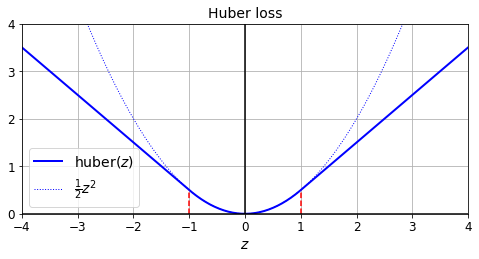

In [82]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [84]:
input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [85]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [86]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 2s 151us/sample - loss: 0.6052 - mae: 0.9727 - val_loss: 0.2142 - val_mae: 0.5068
Epoch 2/2
11610/11610 [==============================] - 1s 87us/sample - loss: 0.2165 - mae: 0.5115 - val_loss: 0.2209 - val_mae: 0.5051


### Saving/Loading Models with Custom Objects

In [87]:
model.save("my_model_with_a_custom_loss.h5")

In [90]:
# to load model containing custom objects we have to provide dictionary which maps function name 
# to actual code with performs it. 
model = keras.models.load_model("my_model_with_a_custom_loss.h5",
                                custom_objects={"huber_fn": huber_fn})

In [91]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 128us/sample - loss: 0.2045 - mae: 0.4954 - val_loss: 0.1907 - val_mae: 0.4685
Epoch 2/2
11610/11610 [==============================] - 1s 95us/sample - loss: 0.1985 - mae: 0.4859 - val_loss: 0.1890 - val_mae: 0.4684


In [92]:
# different thresholds:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [93]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

In [94]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 2s 142us/sample - loss: 0.2197 - mae: 0.4844 - val_loss: 0.2241 - val_mae: 0.4745
Epoch 2/2
11610/11610 [==============================] - 1s 97us/sample - loss: 0.2148 - mae: 0.4804 - val_loss: 0.2541 - val_mae: 0.4867


In [95]:
# When saving model, the threshold will not be saved :/
model.save("my_model_with_a_custom_loss_threshold_2.h5")

In [96]:
# when loading - we have to provide threshold manually - not great !
model = keras.models.load_model("my_model_with_a_custom_loss_threshold_2.h5",
                                custom_objects={"huber_fn": create_huber(2.0)})

In [97]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 2s 181us/sample - loss: 0.2117 - mae: 0.4765 - val_loss: 0.2533 - val_mae: 0.4825
Epoch 2/2
11610/11610 [==============================] - 1s 112us/sample - loss: 0.2095 - mae: 0.4719 - val_loss: 0.2093 - val_mae: 0.4646


In [98]:
# Create subclass of keras.losses.Loss 
# implement get_config()
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [99]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [100]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

In [101]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 2s 141us/sample - loss: 0.8524 - mae: 1.0101 - val_loss: 0.2836 - val_mae: 0.5327
Epoch 2/2
11610/11610 [==============================] - 1s 92us/sample - loss: 0.2517 - mae: 0.5143 - val_loss: 0.2907 - val_mae: 0.5188


In [102]:
model.save("my_model_with_a_custom_loss_class.h5")

In [104]:
#model = keras.models.load_model("my_model_with_a_custom_loss_class.h5", # TODO: check PR #25956
#                                custom_objects={"HuberLoss": HuberLoss})
# not working currently due to check PR #25956

In [105]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 92us/sample - loss: 0.2364 - mae: 0.4981 - val_loss: 0.2517 - val_mae: 0.4947
Epoch 2/2
11610/11610 [==============================] - 1s 93us/sample - loss: 0.2287 - mae: 0.4910 - val_loss: 0.2272 - val_mae: 0.4772


In [106]:
model.loss.threshold

2.0

### Other Custom Functions

In [107]:
def my_softplus(z): # return value is just tf.nn.softplus(z)
    return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights): # return value is just tf.nn.relu(weights)
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [108]:
layer = keras.layers.Dense(1, activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=my_l1_regularizer,
                           kernel_constraint=my_positive_weights)

In [109]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=my_l1_regularizer,
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [110]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [111]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 2s 154us/sample - loss: 1.7245 - mae: 0.9152 - val_loss: inf - val_mae: inf
Epoch 2/2
11610/11610 [==============================] - 1s 111us/sample - loss: 0.6187 - mae: 0.5192 - val_loss: inf - val_mae: inf


In [112]:
model.save("my_model_with_many_custom_parts.h5")

In [113]:
# to load - again mapping from function name to implementation has to be provided
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

In [114]:
# if a function has hyperparameters, then appropriate class has to subclassed and get_config() method implemented
# like: keras.regulizers.Regulizer, keras.constraints.Constraint, keras.initializers.Initializer, 
# keras.layers.Layer

class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor": self.factor}

In [115]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=MyL1Regularizer(0.01),
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [116]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [117]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 2s 157us/sample - loss: 1.6372 - mae: 0.9247 - val_loss: inf - val_mae: inf
Epoch 2/2
11610/11610 [==============================] - 1s 111us/sample - loss: 0.5889 - mae: 0.5227 - val_loss: 2.9978 - val_mae: 0.5261


In [118]:
model.save("my_model_with_many_custom_parts.h5")

In [119]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "MyL1Regularizer": MyL1Regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

### Custom metrics

Losses - used to train the model; differentiable; gradients should not be 0 everywhere; Don't have to interpreted 
by meat-AI . 
Metrics - used to evaluate model. ; don't have to be differentiable; gradient ok to be 0; Must be easily interpretable by meat-AI

In [120]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [121]:
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

In [122]:
model.fit(X_train_scaled, y_train, epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 119us/sample - loss: 2.2772 - huber_fn: 0.8287
Epoch 2/2
11610/11610 [==============================] - 1s 80us/sample - loss: 0.8578 - huber_fn: 0.2678


Warning: if you use the same function as the loss and a metric, you may be surprised to see different results. This is generally just due to floating point precision errors: even though the mathematical equations are equivalent, the operations are not run in the same order, which can lead to small differences. Moreover, when using sample weights, there's more than just precision errors:

    the loss since the start of the epoch is the mean of all batch losses seen so far. Each batch loss is the sum of the weighted instance losses divided by the batch size (not the sum of weights, so the batch loss is not the weighted mean of the losses).
    the metric since the start of the epoch is equal to the sum of weighted instance losses divided by sum of all weights seen so far. In other words, it is the weighted mean of all the instance losses. Not the same thing.

If you do the math, you will find that loss = metric * mean of sample weights (plus some floating point precision error).


In [124]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[create_huber(2.0)])

In [125]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

  ...
    to  
  ['...']
Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 2s 146us/sample - loss: 0.1173 - huber_fn: 0.2450
Epoch 2/2
11610/11610 [==============================] - 1s 88us/sample - loss: 0.1125 - huber_fn: 0.2325


In [126]:
history.history["loss"][0], history.history["huber_fn"][0] * sample_weight.mean()

(0.11734722562256196, 0.12153358002729996)

### Streaming metrics

In [133]:
# keep track of true positive and false positive and can compute ration when requested to do
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [134]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [135]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [136]:
#variables which are being tracked and stored.
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [137]:
precision.reset_states()

In [138]:
# streaming metric
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs) # handles base args (e.g., dtype)
        self.threshold = threshold
        #self.huber_fn = create_huber(threshold) # TODO: investigate why this fails
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")
    def huber_fn(self, y_true, y_pred): # workaround
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        return self.total / self.count
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [139]:
m = HuberMetric(2.)

# total = 2 * |10 - 2| - 2²/2 = 14
# count = 1
# result = 14 / 1 = 14
m(tf.constant([[2.]]), tf.constant([[10.]])) 

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [140]:
# total = total + (|1 - 0|² / 2) + (2 * |9.25 - 5| - 2² / 2) = 14 + 7 = 21
# count = count + 2 = 3
# result = total / count = 21 / 3 = 7
m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [141]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [142]:
m.reset_states()
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

In [143]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[HuberMetric(2.0)])

model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 119us/sample - loss: 0.8044 - huber_metric_1: 0.8044
Epoch 2/2
11610/11610 [==============================] - 1s 87us/sample - loss: 0.2597 - huber_metric_1: 0.2597


In [144]:
model.save("my_model_with_a_custom_metric.h5")

In [146]:
#model = keras.models.load_model("my_model_with_a_custom_metric.h5",           # TODO: check PR #25956
#                                custom_objects={"huber_fn": create_huber(2.0),
#                                                "HuberMetric": HuberMetric})

In [147]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 76us/sample - loss: 0.2418 - huber_metric_1: 0.2418
Epoch 2/2
11610/11610 [==============================] - 1s 83us/sample - loss: 0.2308 - huber_metric_1: 0.2308


Warning: In TF 2.2, tf.keras adds an extra first metric in model.metrics at position 0 (see TF issue #38150). This forces us to use model.metrics[-1] rather than model.metrics[0] to access the HuberMetric.

In [153]:
print(tf.__version__, keras.__version__)
# model.metrics[0] # can work since 
model.metrics[-1].threshold

2.1.0 2.2.4-tf


2.0

In [154]:
class HuberMetric(keras.metrics.Mean):
    def __init__(self, threshold=1.0, name='HuberMetric', dtype=None):
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        super().__init__(name=name, dtype=dtype)
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        super(HuberMetric, self).update_state(metric, sample_weight)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}   

In [156]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

model.compile(loss=keras.losses.Huber(2.0), optimizer="nadam", weighted_metrics=[HuberMetric(2.0)])

In [157]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32),
                    epochs=2, sample_weight=sample_weight)

  ...
    to  
  ['...']
Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 2s 155us/sample - loss: 0.4476 - HuberMetric: 0.8939
Epoch 2/2
11610/11610 [==============================] - 1s 91us/sample - loss: 0.1244 - HuberMetric: 0.2484


In [158]:
history.history["loss"][0], history.history["HuberMetric"][0] * sample_weight.mean()

(0.4476402258418635, 0.4476401631782943)

In [159]:
model.save("my_model_with_a_custom_metric_v2.h5")

In [160]:
#model = keras.models.load_model("my_model_with_a_custom_metric_v2.h5",        # TODO: check PR #25956
#                                custom_objects={"HuberMetric": HuberMetric})

In [161]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 106us/sample - loss: 0.2328 - HuberMetric: 0.2328
Epoch 2/2
11610/11610 [==============================] - 1s 73us/sample - loss: 0.2250 - HuberMetric: 0.2250


In [162]:
model.metrics[-1].threshold

2.0

### Custom Layers

In [163]:
# aplly exp() function to its inputs 
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [165]:
exponential_layer([-1., -2., 0.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 0.13533528, 1.        ], dtype=float32)>

In [166]:
# it can be used as output layer, when values to predict have vastly dufferent scales ( 0.001 , 1, 10, 10000)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer
])
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 2s 132us/sample - loss: 0.8247 - val_loss: 0.4985
Epoch 2/5
11610/11610 [==============================] - 1s 90us/sample - loss: 0.4890 - val_loss: 0.3960
Epoch 3/5
11610/11610 [==============================] - 1s 86us/sample - loss: 0.4280 - val_loss: 0.3680
Epoch 4/5
11610/11610 [==============================] - 1s 104us/sample - loss: 0.4134 - val_loss: 0.3665
Epoch 5/5
5160/5160 [==============================] - 0s 43us/sample - loss: 0.3828


0.38283333600491515

In [168]:
class MyDense(keras.layers.Layer):
    # constructor takes args, calls super class with standard arguments **kwargs, 
    # like input_shape, trainable, name
    # saves hyperparameters: units, activation
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    # create layers variables by calling add_weight() method for each weight.
    # build() method is called the first time layer is used. At that point Keras will know 
    # layers input shapes. At the end we call parent build() to tell Keras that layer is built 
    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape) # must be at the end

    # call method performs ops. We compute matrix multiplication of input X and layer kernel, 
    # add bias vector & apply activaction function to the result - this gives us output of the layer
    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    # compute_output_shape returns shape of this layer's outputs. 
    # In this case it's shape of input, last dimension is replaced number of neurons in the layer.
    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])

    # get_config() to save configuration, using keras.activations.serialize to save activation
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation)}

In [169]:
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])

In [170]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 2s 205us/sample - loss: 1.5625 - val_loss: 2.4002
Epoch 2/2
5160/5160 [==============================] - 0s 35us/sample - loss: 0.4737


0.47365213221357777

In [171]:
model.save("my_model_with_a_custom_layer.h5")

In [172]:
model = keras.models.load_model("my_model_with_a_custom_layer.h5",
                                custom_objects={"MyDense": MyDense})

In [173]:
# To create layer with multiple inputs ( Concatenate ), the arg to call() method
# should be tuple containing all the inputs, arg to compute_output_shape() whould b tuple containing
# each input's shape. call() should return list of inputs, compute_output_shape() should return list of batch 
# output shapes
class MyMultiLayer(keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        return X1 + X2, X1 * X2

    def compute_output_shape(self, batch_input_shape):
        batch_input_shape1, batch_input_shape2 = batch_input_shape
        return [batch_input_shape1, batch_input_shape2]

In [174]:
inputs1 = keras.layers.Input(shape=[2])
inputs2 = keras.layers.Input(shape=[2])
outputs1, outputs2 = MyMultiLayer()((inputs1, inputs2))

Let's create a layer with a different behavior during training and testing:


In [175]:
class AddGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

In [176]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 2s 137us/sample - loss: 0.4485 - val_loss: 0.6683
Epoch 2/2
5160/5160 [==============================] - 0s 48us/sample - loss: 0.3970


0.39703579826872476

### Custom Models

In [177]:
X_new_scaled = X_test_scaled

In [178]:
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu",
                                          kernel_initializer="he_normal")
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

In [179]:
class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30, activation="elu",
                                          kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

In [180]:
model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 3s 229us/sample - loss: 8.0442
Epoch 2/5
11610/11610 [==============================] - 2s 154us/sample - loss: 1.6168
Epoch 3/5
11610/11610 [==============================] - 2s 150us/sample - loss: 1.6356
Epoch 4/5
11610/11610 [==============================] - 2s 157us/sample - loss: 0.9895
Epoch 5/5
5160/5160 [==============================] - 0s 74us/sample - loss: 1.0578


In [181]:
model.save("my_custom_model.ckpt")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_custom_model.ckpt\assets


We could have defined the model using the sequential API instead:

In [182]:
block1 = ResidualBlock(2, 30)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal"),
    block1, block1, block1, block1,
    ResidualBlock(2, 30),
    keras.layers.Dense(1)
])

In [183]:
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 2s 189us/sample - loss: 3.4915
Epoch 2/5
11610/11610 [==============================] - 1s 110us/sample - loss: 0.5706
Epoch 3/5
11610/11610 [==============================] - 1s 116us/sample - loss: 0.5802
Epoch 4/5
11610/11610 [==============================] - 1s 118us/sample - loss: 0.5540
Epoch 5/5
5160/5160 [==============================] - 0s 59us/sample - loss: 0.5548


### Losses and Metrics Based on Model Internals

In [184]:
class ReconstructingRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(30, activation="selu",
                                          kernel_initializer="lecun_normal")
                       for _ in range(5)]
        self.out = keras.layers.Dense(output_dim)
        # TODO: check https://github.com/tensorflow/tensorflow/issues/26260
        #self.reconstruction_mean = keras.metrics.Mean(name="reconstruction_error")

    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = keras.layers.Dense(n_inputs)
        super().build(batch_input_shape)

    def call(self, inputs, training=None):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
        #if training:
        #    result = self.reconstruction_mean(recon_loss)
        #    self.add_metric(result)
        return self.out(Z)

In [185]:
model = ReconstructingRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=2)
y_pred = model.predict(X_test_scaled)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 3s 259us/sample - loss: 0.8015
Epoch 2/2
11610/11610 [==============================] - 2s 148us/sample - loss: 0.4282


## Computing Gradients with Autodiff


In [186]:
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

In [187]:
w1, w2 = 5, 3
eps = 1e-6
(f(w1 + eps, w2) - f(w1, w2)) / eps

36.000003007075065

In [188]:
(f(w1, w2 + eps) - f(w1, w2)) / eps

10.000000003174137

In [190]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])
# tf.GradientTape records every op that involves a variable. We can later ask tape to compute gradient

In [191]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [193]:
# tape is erased automatically after calling gradient().
with tf.GradientTape() as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
try:
    dz_dw2 = tape.gradient(z, w2)
except RuntimeError as ex:
    print(ex)

GradientTape.gradient can only be called once on non-persistent tapes.


In [195]:
# Tape can be made persistent & delete it after being used to free up resources
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2) # works now!
del tape

In [196]:
dz_dw1, dz_dw2

(<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>)

In [198]:
# by default, gradient is computed only in regard to Variable. 
# gradient with regard to anything else is None
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [199]:
gradients

[None, None]

In [201]:
# we can force tape to watch any tensors so gradient can be computed 
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [202]:
with tf.GradientTape() as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)

tape.gradient([z1, z2, z3], [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>]

In [203]:
with tf.GradientTape(persistent=True) as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)

tf.reduce_sum(tf.stack([tape.gradient(z, [w1, w2]) for z in (z1, z2, z3)]), axis=0)
del tape

In [204]:
with tf.GradientTape(persistent=True) as hessian_tape:
    with tf.GradientTape() as jacobian_tape:
        z = f(w1, w2)
    jacobians = jacobian_tape.gradient(z, [w1, w2])
hessians = [hessian_tape.gradient(jacobian, [w1, w2])
            for jacobian in jacobians]
del hessian_tape

In [205]:
jacobians

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [206]:
hessians

[[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=2.0>],
 [<tf.Tensor: shape=(), dtype=float32, numpy=2.0>, None]]

In [207]:
# sometimes autodiff can lead to numerical difficulties:
x = tf.Variable(100.)
with tf.GradientTape() as tape:
    z = my_softplus(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(), dtype=float32, numpy=nan>]

In [209]:
# true gradient :
tf.math.log(tf.exp(tf.constant(30., dtype=tf.float32)) + 1.)

<tf.Tensor: shape=(), dtype=float32, numpy=30.0>

In [210]:
x = tf.Variable([100.])
with tf.GradientTape() as tape:
    z = my_softplus(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>]

In [211]:
# we can annotate function with @tf.custom_gradient,
# return both output and analytical gradient
@tf.custom_gradient
def my_better_softplus(z):
    exp = tf.exp(z)
    def my_softplus_gradients(grad):
        return grad / (1 + 1 / exp)
    return tf.math.log(exp + 1), my_softplus_gradients

In [213]:
x = tf.Variable([1000.])
with tf.GradientTape() as tape:
    z = my_better_softplus(x)

z, tape.gradient(z, [x]) # the main output still explodes for large values

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([inf], dtype=float32)>,
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>])

In [214]:
def my_better_softplus(z):
    return tf.where(z > 30., z, tf.math.log(tf.exp(z) + 1.))

In [215]:
x = tf.Variable([1000.])
with tf.GradientTape() as tape:
    z = my_better_softplus(x)

z, tape.gradient(z, [x])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1000.], dtype=float32)>,
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>])

### Computing Gradients Using Autodiff

### TensorFlow Functions

In [216]:
def cube(x):
    return x ** 3

In [217]:
cube(3)

27

In [218]:
cube(tf.constant(3.0))

<tf.Tensor: shape=(), dtype=float32, numpy=27.0>

In [219]:
# to convert cube() function to tensorflow function : 
tf_cube = tf.function(cube)
tf_cube

In [220]:
tf_cube(3), tf_cube(tf.constant(3.0))

(<tf.Tensor: shape=(), dtype=int32, numpy=27>,
 <tf.Tensor: shape=(), dtype=float32, numpy=27.0>)

### TF Functions and Concrete Functions

In [221]:
concrete_function = tf_cube.get_concrete_function(tf.constant(2.0))
concrete_function.graph

In [223]:
concrete_function(tf.constant(3.0))

<tf.Tensor: shape=(), dtype=float32, numpy=27.0>

In [224]:
concrete_function is tf_cube.get_concrete_function(tf.constant(3.0))

True

### Exploring Function Definitions and Graphs

In [225]:
concrete_function.graph

In [226]:
ops = concrete_function.graph.get_operations()
ops

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'pow/y' type=Const>,
 <tf.Operation 'pow' type=Pow>,
 <tf.Operation 'Identity' type=Identity>]

In [227]:
pow_op = ops[2]
list(pow_op.inputs)

[<tf.Tensor 'x:0' shape=() dtype=float32>,
 <tf.Tensor 'pow/y:0' shape=() dtype=float32>]

In [228]:
pow_op.outputs

[<tf.Tensor 'pow:0' shape=() dtype=float32>]

In [229]:
concrete_function.graph.get_operation_by_name('x')

<tf.Operation 'x' type=Placeholder>

In [230]:
concrete_function.graph.get_tensor_by_name('Identity:0')

<tf.Tensor 'Identity:0' shape=() dtype=float32>

In [231]:
concrete_function.function_def.signature

name: "__inference_cube_83586"
input_arg {
  name: "x"
  type: DT_FLOAT
}
output_arg {
  name: "identity"
  type: DT_FLOAT
}

### How TF Functions Trace Python Functions to Extract Their Computation Graphs

In [233]:
@tf.function
def tf_cube(x):
    print("print:", x)
    return x ** 3

In [234]:
result = tf_cube(tf.constant(2.0))

print: Tensor("x:0", shape=(), dtype=float32)


In [235]:
result

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [236]:
result = tf_cube(2)
result = tf_cube(3)
result = tf_cube(tf.constant([[1., 2.]])) # New shape: trace!
result = tf_cube(tf.constant([[3., 4.], [5., 6.]])) # New shape: trace!
result = tf_cube(tf.constant([[7., 8.], [9., 10.], [11., 12.]])) # no trace

print: 2
print: 3
print: Tensor("x:0", shape=(1, 2), dtype=float32)
print: Tensor("x:0", shape=(2, 2), dtype=float32)
print: Tensor("x:0", shape=(3, 2), dtype=float32)


It is also possible to specify a particular input signature:

In [237]:
@tf.function(input_signature=[tf.TensorSpec([None, 28, 28], tf.float32)])
def shrink(images):
    print("Tracing", images)
    return images[:, ::2, ::2] # drop half the rows and columns

In [238]:
img_batch_1 = tf.random.uniform(shape=[100, 28, 28])
img_batch_2 = tf.random.uniform(shape=[50, 28, 28])
preprocessed_images = shrink(img_batch_1) # Traces the function.
preprocessed_images = shrink(img_batch_2) # Reuses the same concrete function.

Tracing Tensor("images:0", shape=(None, 28, 28), dtype=float32)


In [239]:
img_batch_3 = tf.random.uniform(shape=[2, 2, 2])
try:
    preprocessed_images = shrink(img_batch_3)  # rejects unexpected types or shapes
except ValueError as ex:
    print(ex)

Python inputs incompatible with input_signature:
  inputs: (
    tf.Tensor(
[[[0.6039989  0.5374023 ]
  [0.8282131  0.5199183 ]]

 [[0.8586787  0.3384664 ]
  [0.21358752 0.5725434 ]]], shape=(2, 2, 2), dtype=float32))
  input_signature: (
    TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None))


In [240]:
class LayerNormalization(keras.layers.Layer):
    # constructor takes args, calls super class with standard arguments **kwargs, 
    # like input_shape, trainable, name
    def __init__(self, eps=0.001, **kwargs):
        super().__init__(**kwargs)
        self.eps = eps

    # create layers variables by calling add_weight() method for each weight.
    # build() method is called the first time layer is used. At that point Keras will know 
    # layers input shapes. At the end we call parent build() to tell Keras that layer is built 
    def build(self, batch_input_shape):
        self.alpha = self.add_weight(
            name="alpha", shape=batch_input_shape[-1:], initializer="ones")
        self.beta = self.add_weight(
            name="beta", shape=batch_input_shape[-1:], initializer="zeros")
        super().build(batch_input_shape) # must be at the end

    # call method performs ops. We compute matrix multiplication of input X and layer kernel, 
    # add bias vector & apply activaction function to the result - this gives us output of the layer
    def call(self, X):
        mean, variance = tf.nn.moments(X, axes=-1, keepdims=True)
        return self.alpha * ( X - mean) / ( tf.sqrt(variance + self.eps) ) + self.beta

    # compute_output_shape returns shape of this layer's outputs. 
    # In this case it's shape of input, last dimension is replaced number of neurons in the layer.
    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

    # get_config() to save configuration, using keras.activations.serialize to save activation
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "eps": self.eps}

Notes:
1. eps doesn't habe to be hyperparameter
2. tf.sqrt(variance + self.eps) is better than tf.sqrt(variance) + self.eps since derivative of sqrt(variance) is undevined for 0.

In [242]:
X = X_train.astype(np.float32)

custom_layer_normalization = LayerNormalization(eps=0.001)
keras_layer_normalization = keras.layers.LayerNormalization()

custom_layer_normalization(X)


tf.reduce_mean(keras.losses.mean_absolute_error(keras_layer_normalization(X), custom_layer_normalization(X)))

<tf.Tensor: shape=(), dtype=float32, numpy=3.80914e-08>

In [243]:
random_alpha = np.random.rand(X.shape[-1])
random_beta = np.random.rand(X.shape[-1])

custom_layer_normalization.set_weights([random_alpha, random_beta])
keras_layer_normalization.set_weights([random_alpha, random_beta])

tf.reduce_mean(keras.losses.mean_absolute_error(
    keras_layer_normalization(X), custom_layer_normalization(X)))



<tf.Tensor: shape=(), dtype=float32, numpy=1.2446352e-08>